In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, HTML
def pretty_print(df):
    return display(HTML(df.to_html().replace("\n","<br>")))

In [4]:
df = pd.read_csv('results/all_kadist_works_superclusters_results_wup_0.76.csv')
df = df[['region', 'machine_clusters']]
df.machine_clusters = df.machine_clusters.str.split(',')

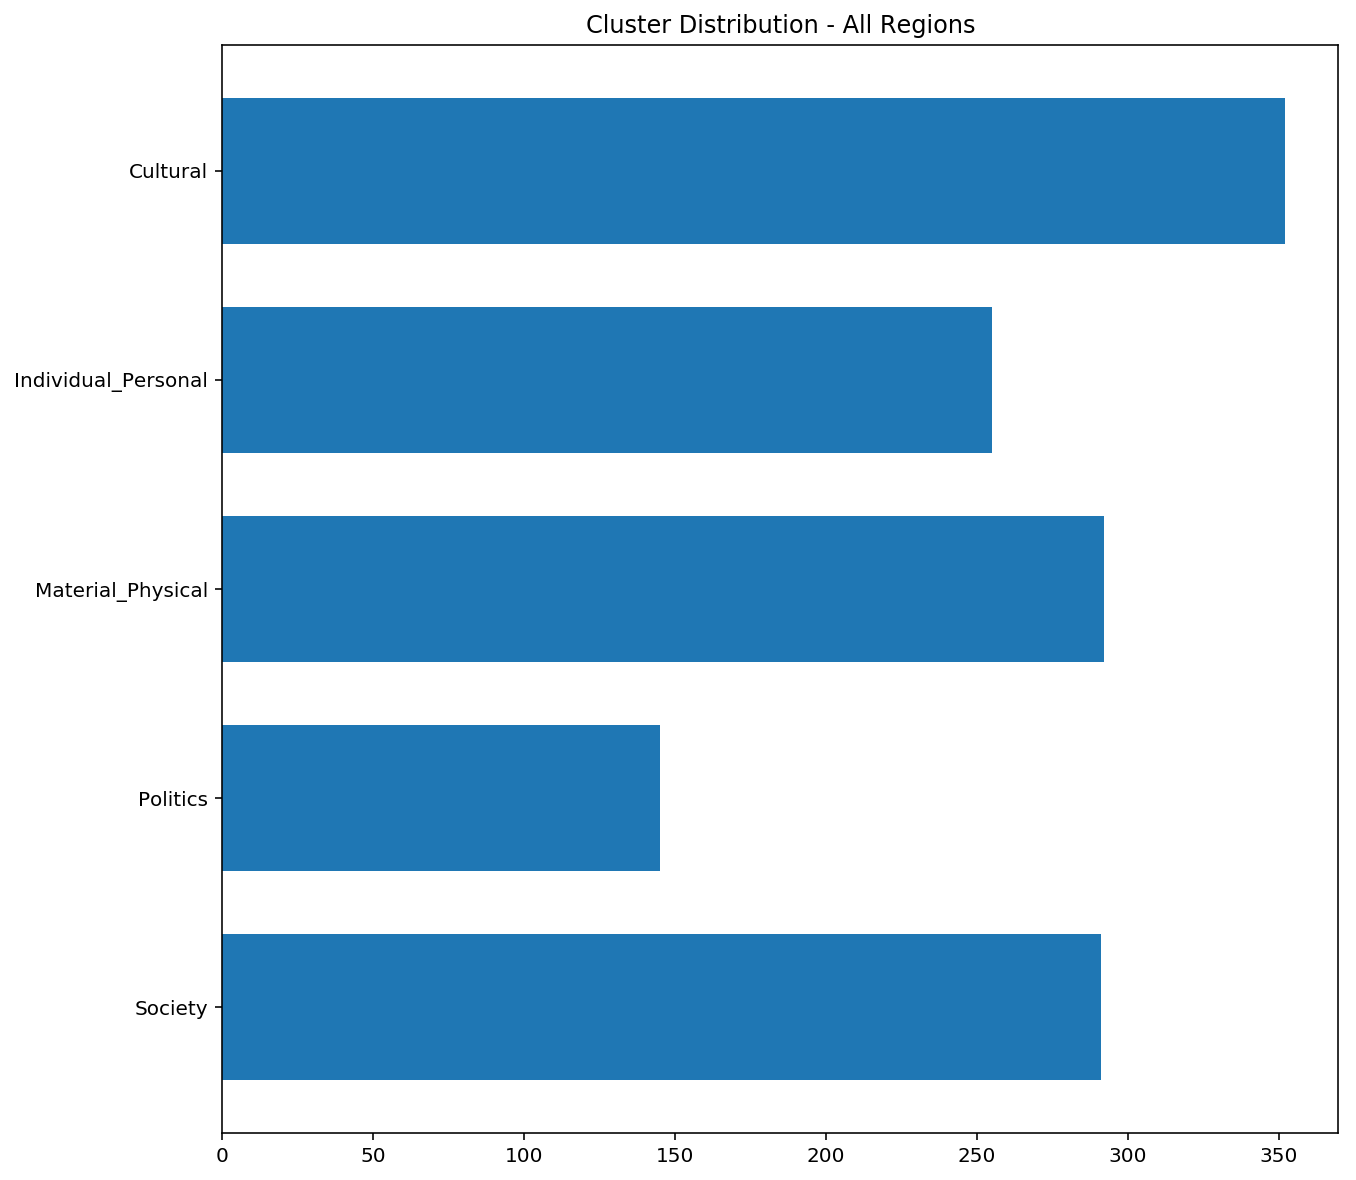

In [5]:
fig, ax = plt.subplots(dpi=144)
vc = df['machine_clusters'].apply(pd.Series).stack().value_counts()
vc = vc.sort_index()
vc.plot(kind='barh', 
        title="Cluster Distribution - All Regions", 
        figsize=(10,10),
        width=0.7,
        ax=ax)
ax.invert_yaxis()

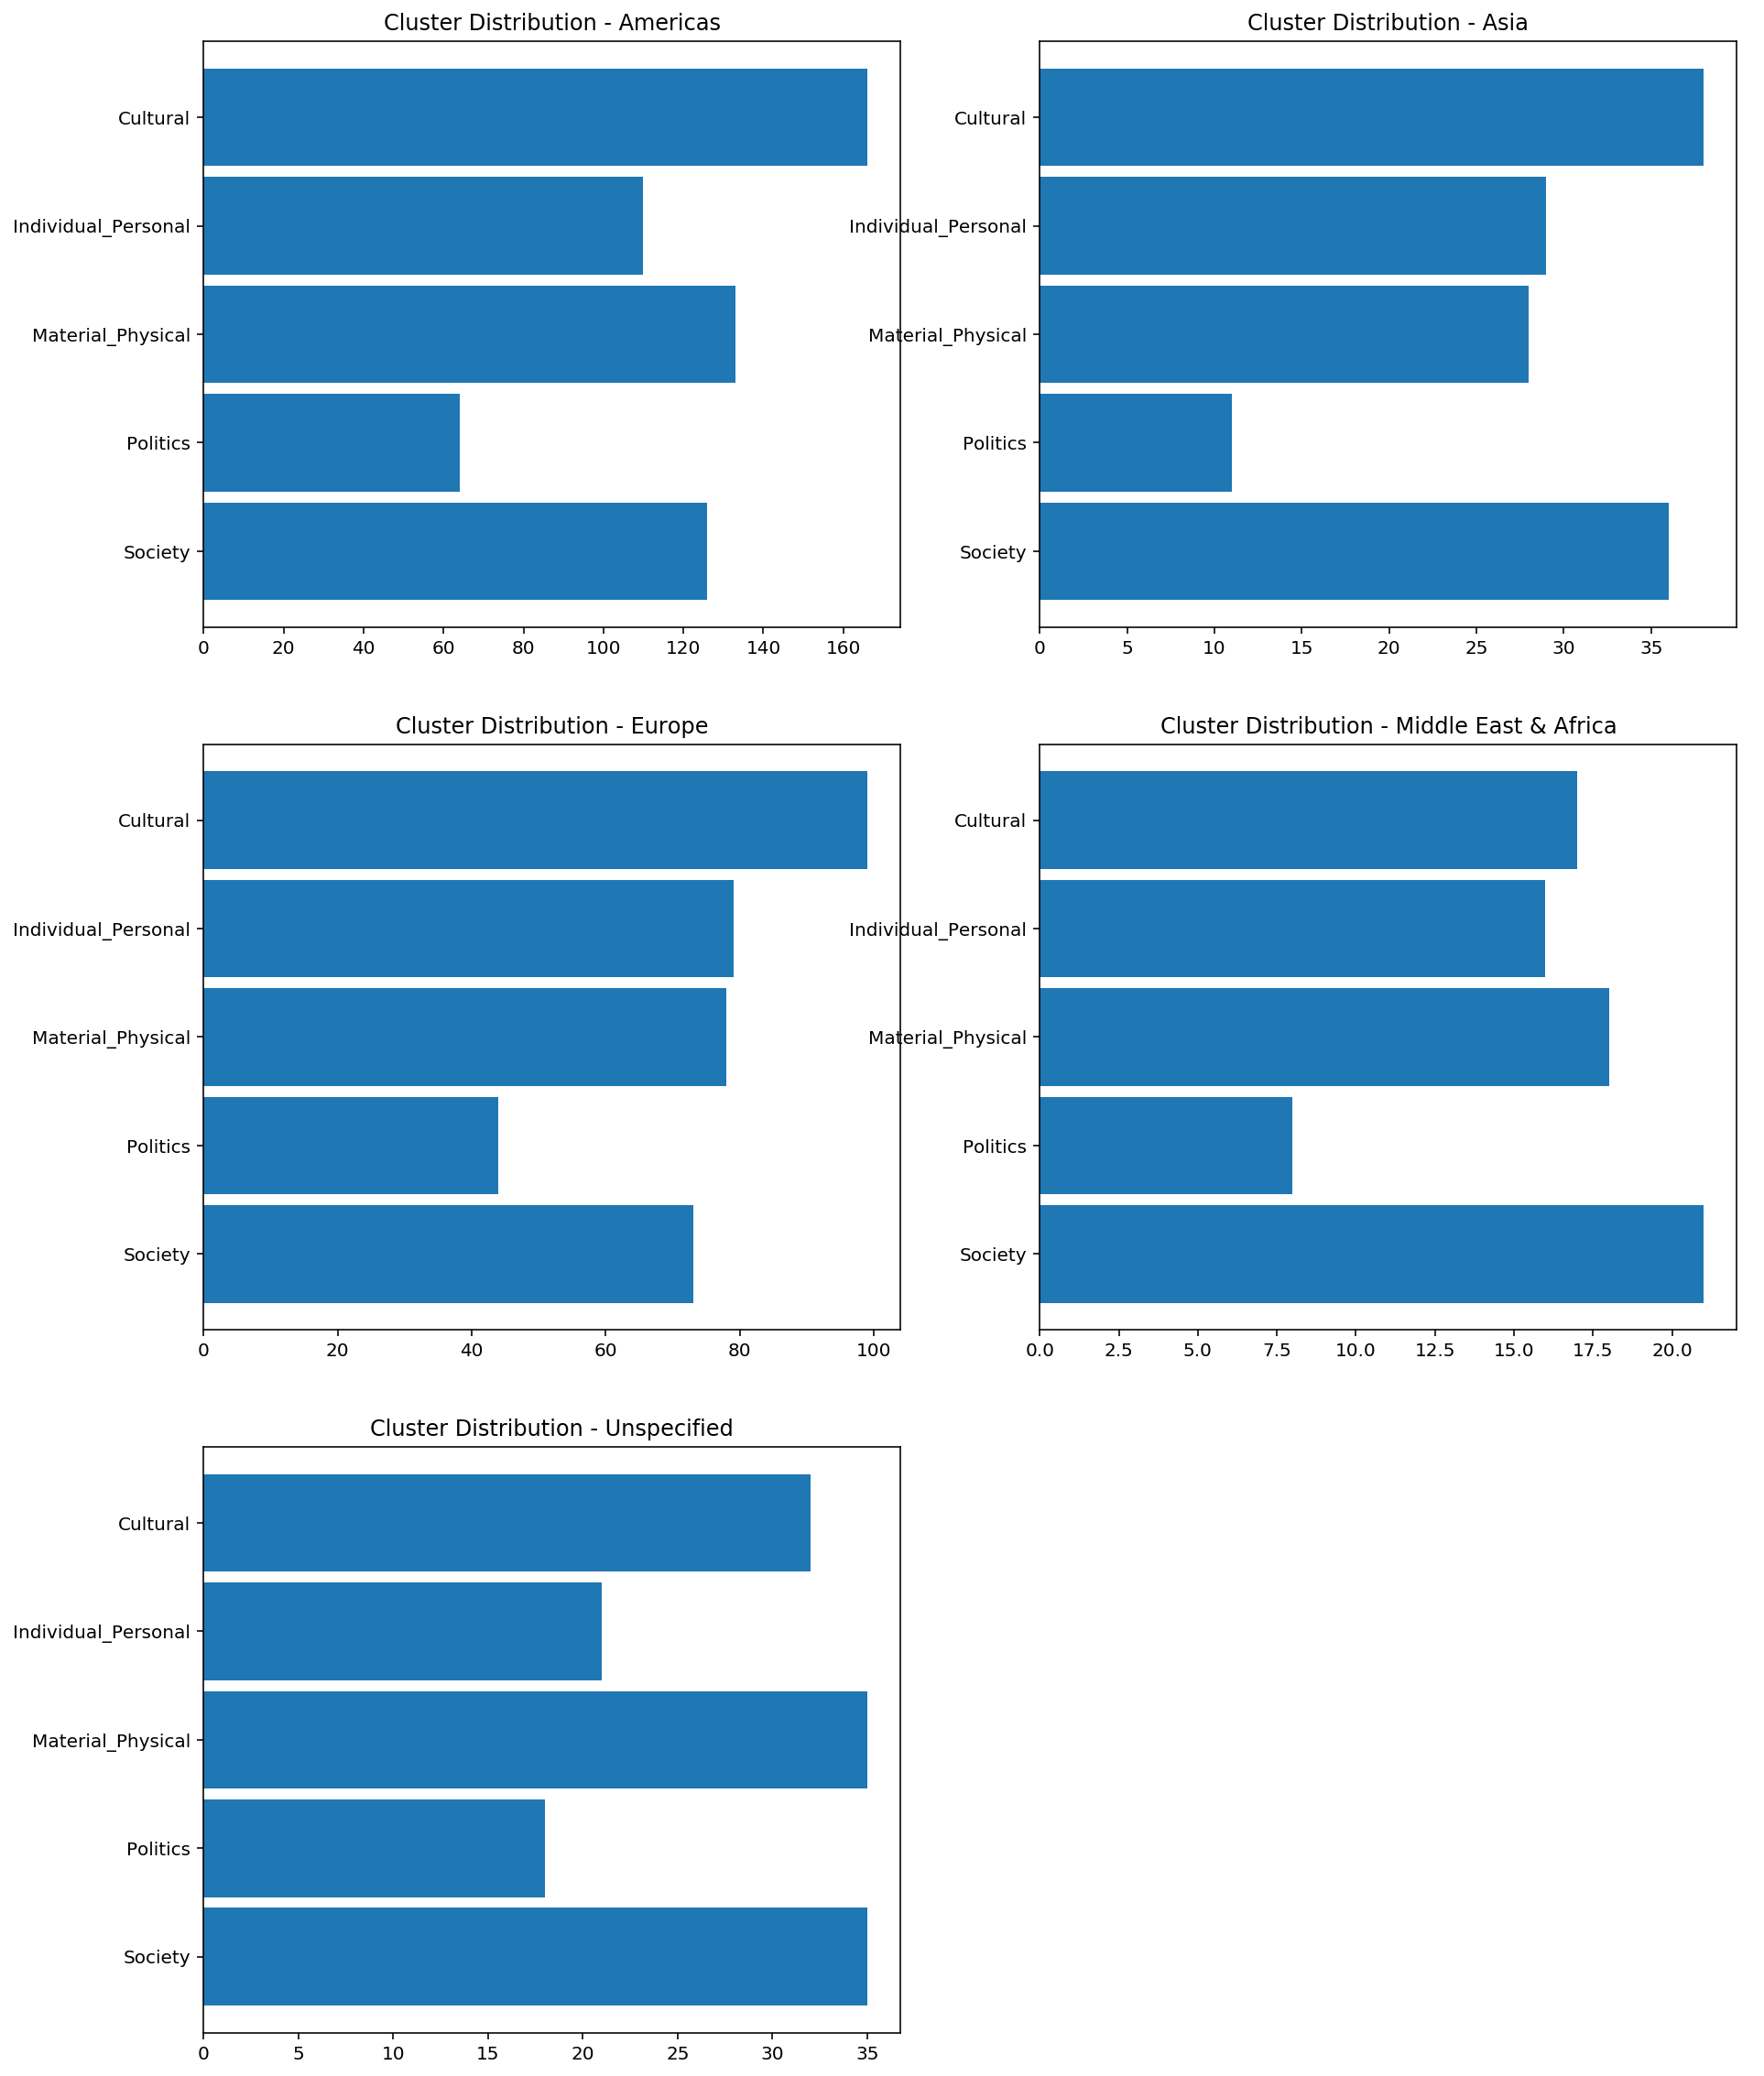

In [6]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(
    nrows=3, ncols=2, dpi=144, figsize=(15,20))
ax6.axis('off')

for i, region in enumerate(sorted(df.region.unique())):
    tmp = df[df.region == region]
    vc = tmp['machine_clusters'].apply(pd.Series).stack().value_counts()
    vc = vc.sort_index()
    vc.plot(kind='barh',
            title="Cluster Distribution - %s" % (region), 
            label=region,
            width=0.9,
            ax=locals()['ax%d'%(i+1)]
    )
    locals()['ax%d'%(i+1)].invert_yaxis()
